---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 2 - Pandas Introduction
All questions are weighted the same in this assignment.
## Part 1
The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. 

The columns are organized as # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals. Use this dataset to answer the questions below.

In [4]:
import pandas as pd

df = pd.read_csv('olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


### Question 0 (Example)

What is the first country in df?

*This function should return a Series.*

In [5]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the row for Afghanistan, which is a Series object. The assignment
    # question description will tell you the general format the autograder is expecting
    return df.iloc[0]

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

# Summer           13
Gold                0
Silver              0
Bronze              2
Total               2
# Winter            0
Gold.1              0
Silver.1            0
Bronze.1            0
Total.1             0
# Games            13
Gold.2              0
Silver.2            0
Bronze.2            2
Combined total      2
ID                AFG
Name: Afghanistan, dtype: object

### Question 1
Which country has won the most gold medals in summer games?

*This function should return a single string value.*

In [6]:
def answer_one():
    return df['Gold'].idxmax() #"YOUR ANSWER HERE"

answer_one()

'United States'

### Question 2
Which country had the biggest difference between their summer and winter gold medal counts?

*This function should return a single string value.*

In [7]:
def answer_two():
    return abs(df['Gold']-df['Gold.1']).idxmax() #"YOUR ANSWER HERE"
answer_two()

'United States'

### Question 3
Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count? 

$$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$

Only include countries that have won at least 1 gold in both summer and winter.

*This function should return a single string value.*

In [8]:
def answer_three():
    sub_df= df[(df['Gold']>=1) & (df['Gold.1']>=1)]
    
    return (abs(sub_df['Gold']-sub_df['Gold.1'])/sub_df['Gold.2']).idxmax() #"YOUR ANSWER HERE"
answer_three()

'Bulgaria'

### Question 4
Write a function to update the dataframe to include a new column called "Points" which is a weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze mdeals for 1 point. The function should return only the column (a Series object) which you created.

*This function should return a Series named `Points` of length 146*

In [9]:
def answer_four():
    Points=3*df['Gold.2']+2*df['Silver.2']+1*df['Bronze.2']
    return  Points #"YOUR ANSWER HERE"
answer_four()

Afghanistan                            2
Algeria                               27
Argentina                            130
Armenia                               16
Australasia                           22
Australia                            923
Austria                              569
Azerbaijan                            43
Bahamas                               24
Bahrain                                1
Barbados                               1
Belarus                              154
Belgium                              276
Bermuda                                1
Bohemia                                5
Botswana                               2
Brazil                               184
British West Indies                    2
Bulgaria                             411
Burundi                                3
Cameroon                              12
Canada                               846
Chile                                 24
China                               1120
Colombia        

## Part 2
For the next set of questions, we will be using census data from the [United States Census Bureau](http://www.census.gov/popest/data/counties/totals/2015/CO-EST2015-alldata.html). Counties are political and geographic subdivisions of states in the United States. This dataset contains population data for counties and states in the US from 2010 to 2015. [See this document](http://www.census.gov/popest/data/counties/totals/2015/files/CO-EST2015-alldata.pdf) for a description of the variable names.

The census dataset (census.csv) should be loaded as census_df. Answer questions using this as appropriate.

### Question 5
Which state has the most counties in it? (hint: consider the sumlevel key carefully! You'll need this for future questions too...)

*This function should return a single string value.*

In [10]:
census_df = pd.read_csv('census.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [11]:
# data cleaning example
sub_census_df=census_df.ix[:,0:7] #only keep the first 8 columns
sub_census_df.head()
sub_census_df.dtypes

SUMLEV       int64
REGION       int64
DIVISION     int64
STATE        int64
COUNTY       int64
STNAME      object
CTYNAME     object
dtype: object

In [12]:
# The first thing you wanna do with a non integer column is to describe it
# top is the most common value in that series which is texas in this case and 
# the frequency of that most common value is also given
sub_census_df.STNAME.describe()

count      3193
unique       51
top       Texas
freq        255
Name: STNAME, dtype: object

In [13]:
# how often each value appears in STNAME series?
sub_census_df.STNAME.value_counts()

Texas                   255
Georgia                 160
Virginia                134
Kentucky                121
Missouri                116
Kansas                  106
Illinois                103
North Carolina          101
Iowa                    100
Tennessee                96
Nebraska                 94
Indiana                  93
Ohio                     89
Minnesota                88
Michigan                 84
Mississippi              83
Oklahoma                 78
Arkansas                 76
Wisconsin                73
Alabama                  68
Florida                  68
Pennsylvania             68
South Dakota             67
Colorado                 65
Louisiana                65
New York                 63
California               59
Montana                  57
West Virginia            56
North Dakota             54
South Carolina           47
Idaho                    45
Washington               40
Oregon                   37
New Mexico               34
Alaska              

In [14]:
sub_census_df.STNAME.value_counts(normalize=True)

Texas                   0.079862
Georgia                 0.050110
Virginia                0.041967
Kentucky                0.037895
Missouri                0.036329
Kansas                  0.033198
Illinois                0.032258
North Carolina          0.031632
Iowa                    0.031319
Tennessee               0.030066
Nebraska                0.029439
Indiana                 0.029126
Ohio                    0.027873
Minnesota               0.027560
Michigan                0.026308
Mississippi             0.025994
Oklahoma                0.024428
Arkansas                0.023802
Wisconsin               0.022863
Alabama                 0.021297
Florida                 0.021297
Pennsylvania            0.021297
South Dakota            0.020983
Colorado                0.020357
Louisiana               0.020357
New York                0.019731
California              0.018478
Montana                 0.017852
West Virginia           0.017538
North Dakota            0.016912
South Caro

In [15]:
#and if you count them it should be one so if because the output is a series
#and you can use any series methods on it like head(), sum() etc.
sub_census_df.STNAME.value_counts(normalize=True).sum()

1.0000000000000002

In [16]:
sub_census_df.STNAME.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [17]:
sub_census_df.STNAME.nunique() #to see the number of unique values in the series

51

In [19]:
# cross tabulation
pd.crosstab(sub_census_df.STNAME, sub_census_df.CTYNAME).head()

CTYNAME,Abbeville County,Acadia Parish,Accomack County,Ada County,Adair County,Adams County,Addison County,Aiken County,Aitkin County,Alabama,...,Yoakum County,Yolo County,York County,Young County,Yuba County,Yukon-Koyukuk Census Area,Yuma County,Zapata County,Zavala County,Ziebach County
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Alaska,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
California,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [20]:
sub_census_df.DIVISION.describe()

count    3193.000000
mean        5.191356
std         1.973991
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: DIVISION, dtype: float64

In [21]:
sub_census_df.DIVISION.mean()

5.191356091450047

In [22]:
sub_census_df.DIVISION.value_counts()

4    625
5    597
7    474
3    442
6    368
8    289
9    172
2    153
1     73
Name: DIVISION, dtype: int64

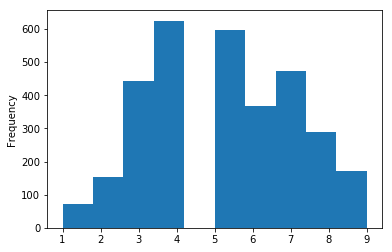

In [25]:
%matplotlib inline
sub_census_df.DIVISION.plot(kind='hist')

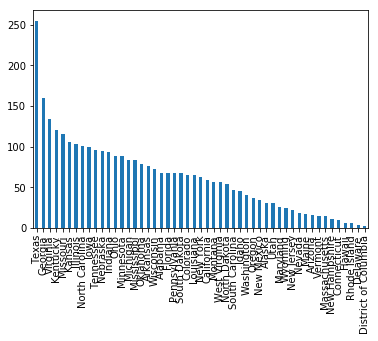

In [26]:
sub_census_df.STNAME.value_counts().plot(kind='bar')

In [27]:
def answer_five(): #solution 1
    unique_counties = census_df.groupby('STNAME')['COUNTY'].nunique().idxmax()  
    return unique_counties  
answer_five()

'Texas'

In [28]:
def answer_five(): #solution 2
    counties_df = census_df[census_df['SUMLEV'] == 50]
    x = counties_df.groupby('STNAME')['SUMLEV'].count()
    ans = x.idxmax()
    return ans
answer_five()

'Texas'

In [29]:
def answer_five(): #solution 3
    return census_df.groupby(["STNAME"],sort=False).sum()["COUNTY"].idxmax() 
answer_five()

'Texas'

### Question 6
Only looking at the three most populous counties for each state, what are the three most populous states (in order of highest population to lowest population)?

*This function should return a list of string values.*

In [30]:
def answer_six():
    sub2_census_df = census_df.set_index(['STNAME','CTYNAME'])
    s = sub2_census_df.CENSUS2010POP
    
    return s.groupby(level='STNAME').nlargest(3)
answer_six()

STNAME                STNAME                CTYNAME                     
Alabama               Alabama               Alabama                          4779736
                                            Jefferson County                  658466
                                            Mobile County                     412992
Alaska                Alaska                Alaska                            710231
                                            Anchorage Municipality            291826
                                            Fairbanks North Star Borough       97581
Arizona               Arizona               Arizona                          6392017
                                            Maricopa County                  3817117
                                            Pima County                       980263
Arkansas              Arkansas              Arkansas                         2915918
                                            Pulaski County                   

In [31]:
def answer_six(): #solution 2
    cdf = census_df[census_df['SUMLEV'] == 50] #a datafrom of only counties
    cdf = cdf.groupby('STNAME') #group it by state name
    cdf = cdf.apply(lambda x:x.sort_values('CENSUS2010POP', ascending=False)).reset_index(drop=True) # sort it
    cdf = cdf.groupby('STNAME').head(3) #get only the top 3
    cdf = cdf.groupby('STNAME').sum() # sum it up
    cdf = cdf.sort_values('CENSUS2010POP', axis=0, ascending=False).head(3) # sort it and show only the top 3
    return list(cdf.index)
answer_six()

['California', 'Texas', 'Illinois']

In [32]:
def answer_six(): #solution 3
    
    sumlev = census_df.SUMLEV.values == 50
    data = census_df[['CENSUS2010POP', 'STNAME', 'CTYNAME']].values[sumlev]

    return data

answer_six()

array([[54571, 'Alabama', 'Autauga County'],
       [182265, 'Alabama', 'Baldwin County'],
       [27457, 'Alabama', 'Barbour County'],
       ..., 
       [21118, 'Wyoming', 'Uinta County'],
       [8533, 'Wyoming', 'Washakie County'],
       [7208, 'Wyoming', 'Weston County']], dtype=object)

In [33]:
def answer_six(): #solution 3
    # subset df to things I care about
    sumlev = census_df.SUMLEV.values == 50
    data = census_df[['CENSUS2010POP', 'STNAME', 'CTYNAME']].values[sumlev]

    # build a pandas series with State and County in the index
    # vaues are from CENSUS2010POP
    s = pd.Series(data[:, 0], [data[:, 1], data[:, 2]], dtype='int64')

    # define a function that does the nlargest and sum in one
    # otherwise you'd have to do a second groupby
    def sum_largest(x, n=3):
        return x.nlargest(n).sum()

    return s.groupby(level=0).apply(sum_largest).nlargest(3).index.tolist()
answer_six()

['California', 'Texas', 'Illinois']

In [34]:
# solution 4
only_county = census_df[census_df['SUMLEV'] == 50]

def top(df, n=3, column='CENSUS2010POP'):
    return df.sort_values(column, ascending=False)[:n]['CENSUS2010POP'].sum()


grouped = only_county[['STNAME', 'CTYNAME', 'CENSUS2010POP']].groupby('STNAME').apply(top)
grouped.sort_values(ascending=False)[:3].index.tolist()

['California', 'Texas', 'Illinois']

### Question 7
Which county has had the largest absolute change in population within the period 2010-2015? (Hint: population values are stored in columns POPESTIMATE2010 through POPESTIMATE2015, you need to consider all six columns.)

e.g. If County Population in the 5 year period is 100, 120, 80, 105, 100, 130, then its largest change in the period would be |130-80| = 50.

*This function should return a single string value.*

In [35]:
# solution 1
only_county = census_df[census_df['SUMLEV'] == 50]


def get_change(row):
    pop_year = row[['POPESTIMATE2010', 
                    'POPESTIMATE2011', 
                    'POPESTIMATE2012', 
                    'POPESTIMATE2013', 
                    'POPESTIMATE2014', 
                    'POPESTIMATE2015']]
    return pop_year.max() - pop_year.min()


only_county.loc[only_county.apply(get_change, axis=1).argmax()]['CTYNAME']

'Harris County'

In [36]:
def answer_seven():
    return #"YOUR ANSWER HERE"
answer_seven()

### Question 8
In this datafile, the United States is broken up into four regions using the "REGION" column. 

Create a query that finds the counties that belong to regions 1 or 2, whose name starts with 'Washington', and whose POPESTIMATE2015 was greater than their POPESTIMATE 2014.

*This function should return a 5x2 DataFrame with the columns = ['STNAME', 'CTYNAME'] and the same index ID as the census_df (sorted ascending by index).*

In [37]:
def answer_eight(): # solution 1
    counties_df = census_df[census_df['SUMLEV'] == 50]
    ans = counties_df[((counties_df['REGION']==1)|(counties_df['REGION']==2))&(counties_df['CTYNAME']=='Washington County')&(counties_df['POPESTIMATE2015']>counties_df['POPESTIMATE2014'])][['STNAME','CTYNAME']]
    return ans

answer_eight()

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County
